# Sesi 6 - Pandas Cleaning

In [84]:
import pandas as pd
import numpy as np

Load dataset

In [85]:
df_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df = df_ori.copy()
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [86]:
df.ST_NUM.isnull().sum()

2

In [87]:
df[['ST_NUM','ST_NAME']].isnull().sum()

ST_NUM     2
ST_NAME    0
dtype: int64

In [88]:
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [89]:
df.NUM_BEDROOMS.isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

n/a dan NA = dibaca sbg missing value oleh py

-- dan na = dibaca sbg string oleh py

In [90]:
missing_value = ['--','na']
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',na_values=missing_value)

In [91]:
np.nan

nan

In [92]:
df.loc[3, 'OWN_OCCUPIED']

'12'

In [93]:
cnt = 0
for i in df.OWN_OCCUPIED:
    try:
        int(i)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except:
        pass
    cnt+=1

In [94]:
df.OWN_OCCUPIED

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [95]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [96]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [97]:
df.isnull().values.any()

True

artinya betul di data kita ada mis val

In [98]:
df.isnull().sum().sum()

12

jumlah mis val setiap colum adalah 12 value

Untuk imputasi missing_value, harus dicek dulu distribusi datanya. Skew / Normal distribusi.

Jika skew nya :   
__-0.5 s/d 0.5__ maka bisa dibilang ***normal distribution***   
__-0.5 s/d - 1__ OR __0.5 s/d 1__ maka ***skew distribution***  
__< -1__ OR __> 1__ maka ***extreme skew distribution***  

Jika normal distribution --> metode imputasinya `.mean()`  
Jika skew distribution --> metode imputasinya `.median()`

In [99]:
df.ST_NUM.skew()

-2.497141895219325

karena kolom ST_NUM adalah skew extreme, maka imputasi menggunakan median

In [100]:
df.ST_NUM.fillna(df.ST_NUM.median()) # ini hanya munculin aja kolom st_num dengan misval di imputasi dgn median value tanpa merubah data asli

0    104.0
1    197.0
2    203.0
3    201.0
4    203.0
5    207.0
6    203.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

buktinya ketika dipanggil lagi `df.ST_NUM` masih ada mis val.

In [101]:
df.ST_NUM

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

Jadi harus pakai inplace = True, atau ditimpa.

In [102]:
df.ST_NUM.fillna(df.ST_NUM.median(), inplace=True) # cara 1
# df.ST_NUM = df.ST_NUM.fillna(df.ST_NUM.median()) # cara 2

In [103]:
df.ST_NUM

0    104.0
1    197.0
2    203.0
3    201.0
4    203.0
5    207.0
6    203.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [104]:
df.iloc[2,1]

203.0

In [105]:
data_obes = pd.read_excel('obes.xls',sheet_name='7.2', skiprows=4, skipfooter=14)
data_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [106]:
data_obes.rename(columns = {'Unnamed: 0' : 'Year'},inplace=True)

In [107]:
data_obes.columns

Index(['Year', 'Total', 'Under 16', '16-24', '25-34', '35-44', '45-54',
       '55-64', '65-74', '75 and over'],
      dtype='object')

In [108]:
# make year columne become index
data_obes.set_index('Year', inplace=True)

In [109]:
data_obes.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [111]:
data_obes.dropna(inplace=True)

In [114]:
data_obes.columns

Index(['Total', 'Under 16', '16-24', '25-34', '35-44', '45-54', '55-64',
       '65-74', '75 and over'],
      dtype='object')

<Axes: xlabel='Year'>

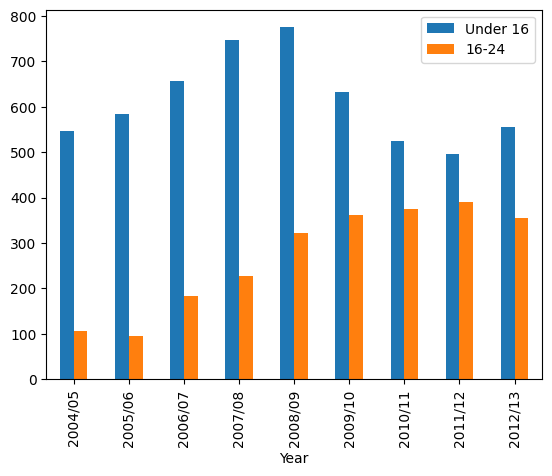

In [119]:
# contoh
data_obes.loc[data_obes.Total > 2000,['Under 16','16-24']].plot(kind='bar')

In [ ]:

data_obes.to_csv('data_obes_cleanned.xls',index=False) # index nya python mau include? yes = True, no = False